In [1]:
%matplotlib inline

import os

import ipywidgets as ipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from skimage.color import label2rgb

from preparation import train_valid_split
from utils import read_masks, relabel_random_colors
from postprocessing import postprocess

MASKS = '/mnt/ml-team/dsb_2018/kuba/debug/outputs/mask_resize'
CONTOURS =  '/mnt/ml-team/dsb_2018/kuba/debug/outputs/contour_resize'

META = '/mnt/ml-team/dsb_2018/files/stage1_metadata.csv'

In [2]:
meta = pd.read_csv(META)
meta_test = meta[meta['is_train']==0]
meta_train, meta_valid = train_valid_split(meta[meta['is_train']==1],0.2,[0,1])

In [3]:
k=100
masks = joblib.load(MASKS)['resized_images'][:k]
contours = joblib.load(CONTOURS)['resized_images'][:k]
ground_truth = read_masks(meta_train['file_path_masks'].tolist()[:k])

100%|██████████| 100/100 [00:07<00:00, 13.65it/s]


In [4]:
def random_crop(*images, target_shape):
    h,w = images[1].shape
    dy, dx = target_shape
    x = np.random.randint(0, w-dx-1)
    y = np.random.randint(0, h-dy-1)
    cropped_images = []
    for image in images:
        cropped_images.append(image[y:y+dy,x:x+dx])
    return cropped_images

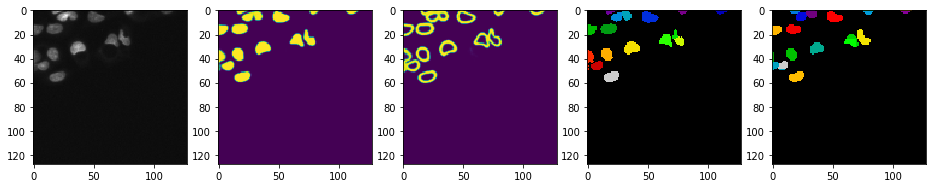

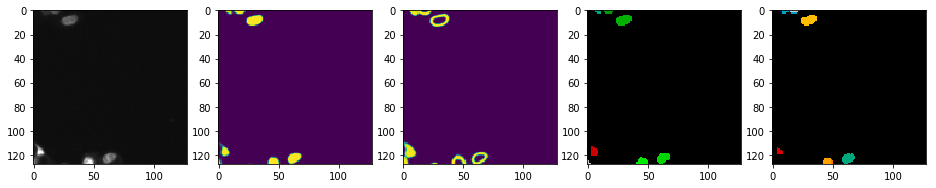

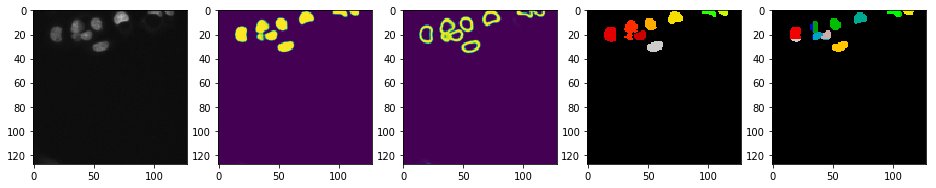

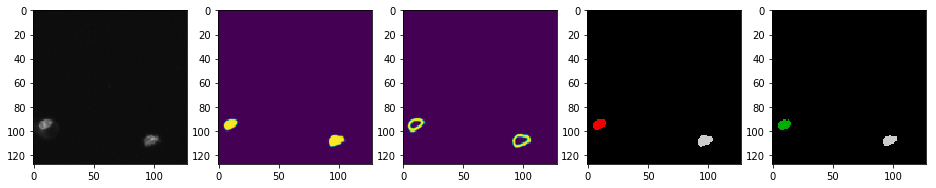

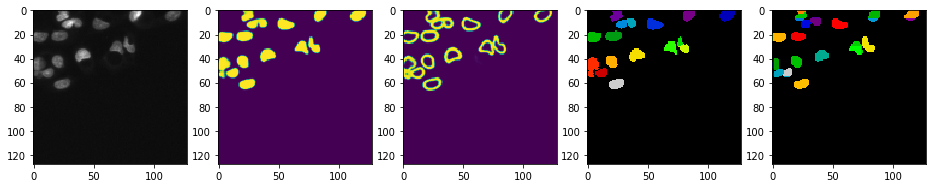

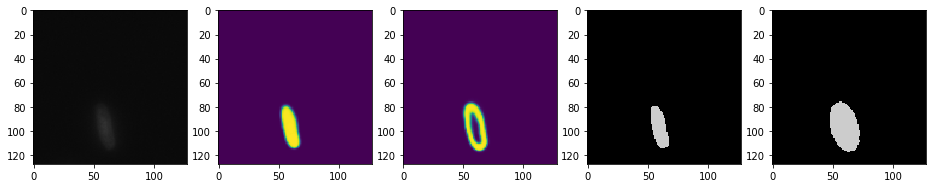

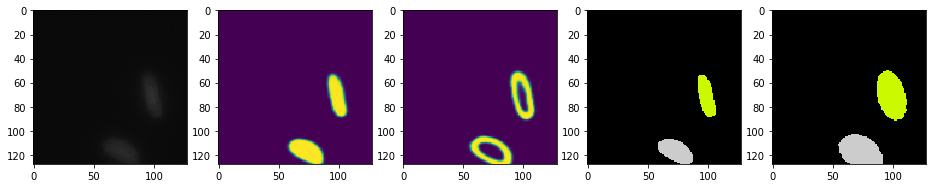

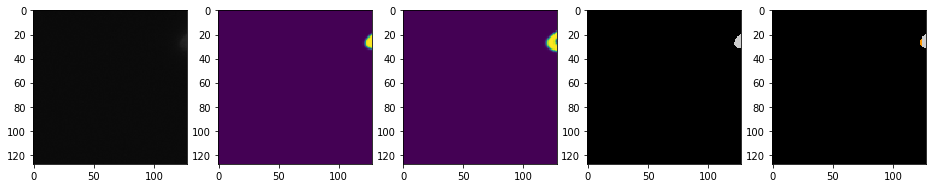

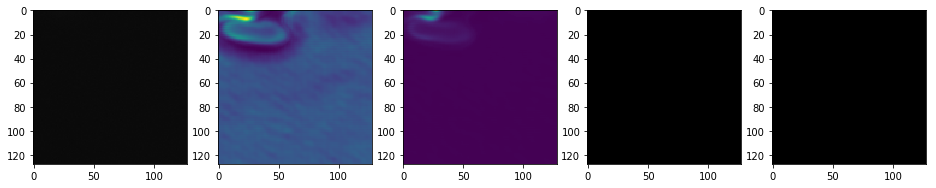

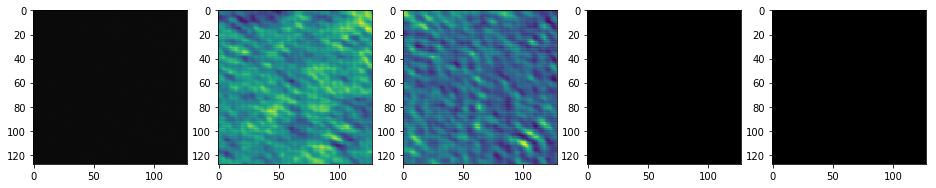

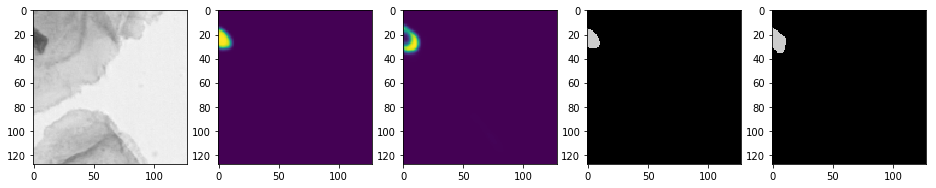

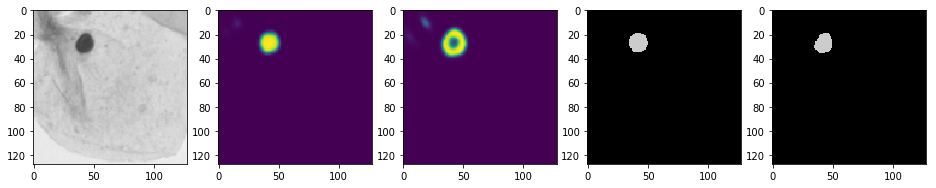

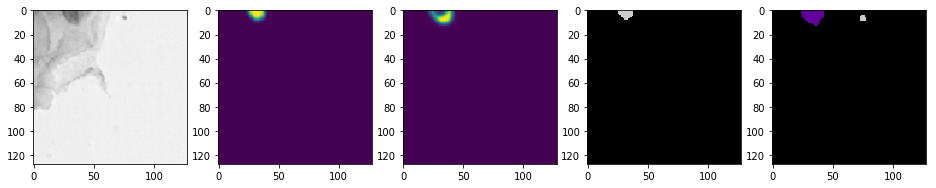

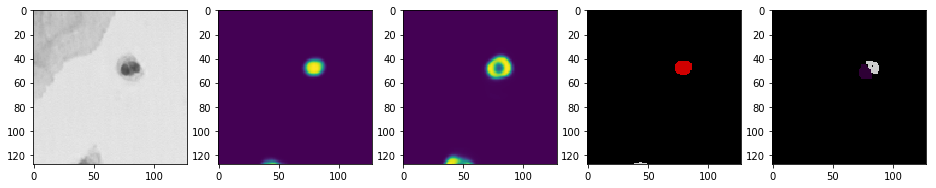

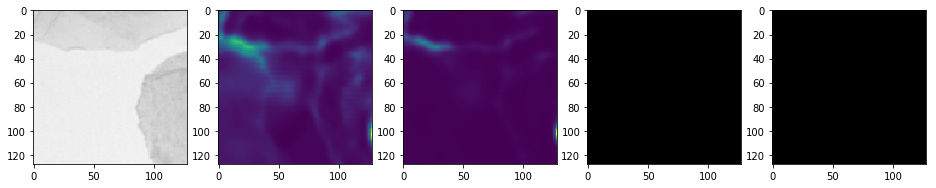

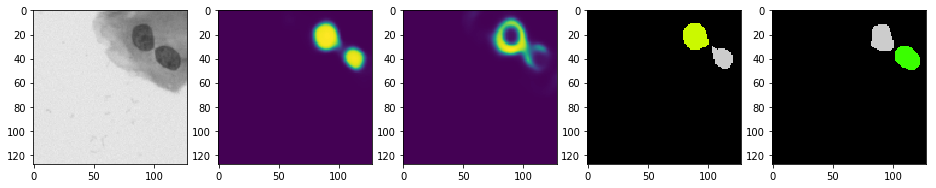

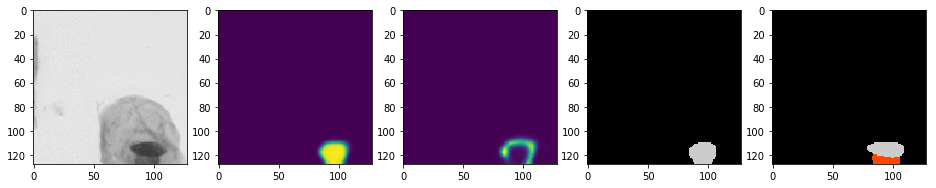

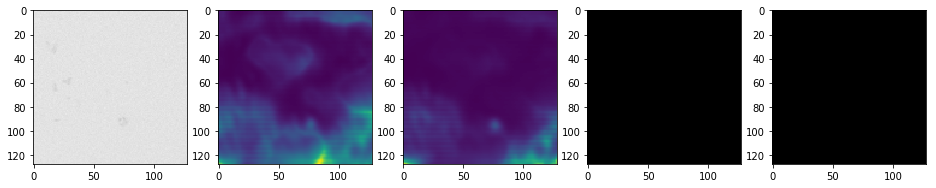

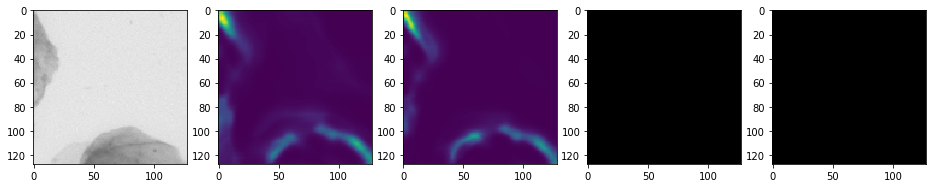

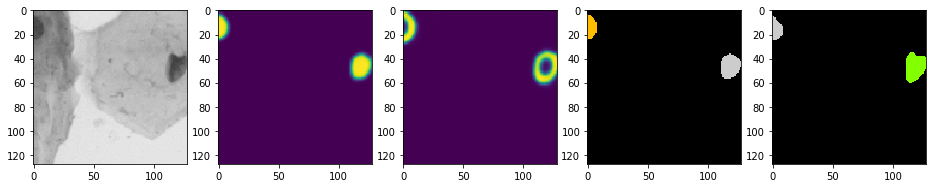

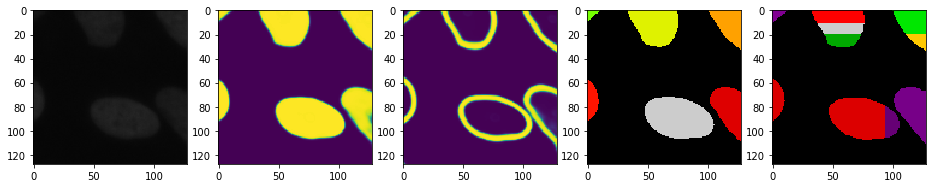

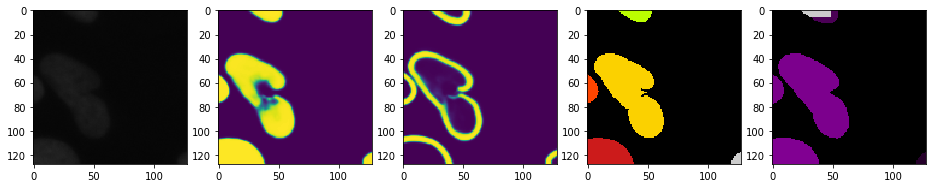

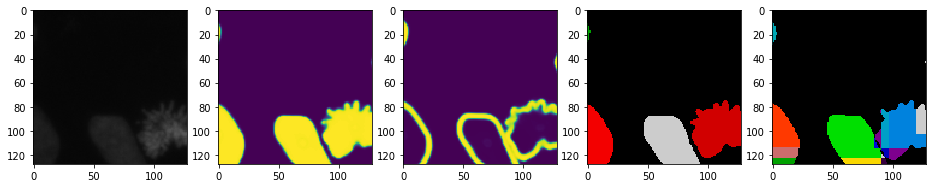

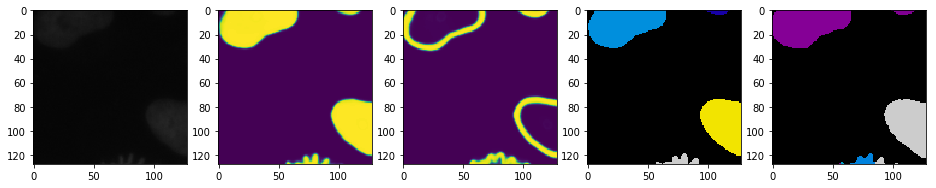

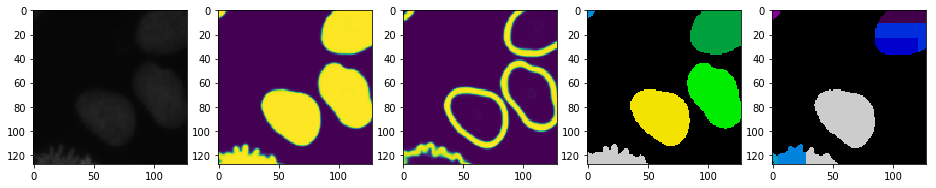

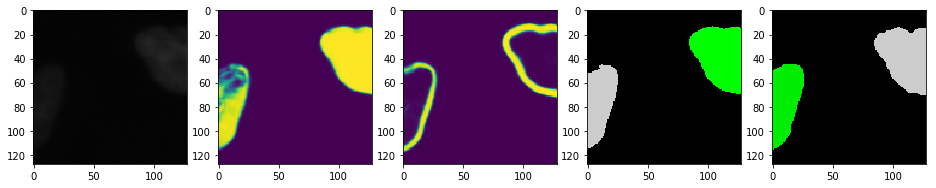

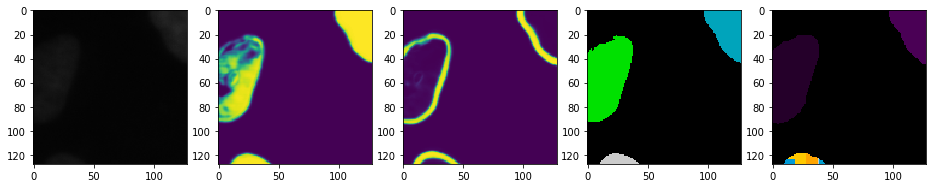

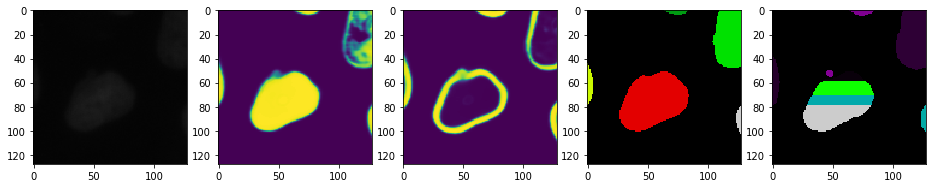

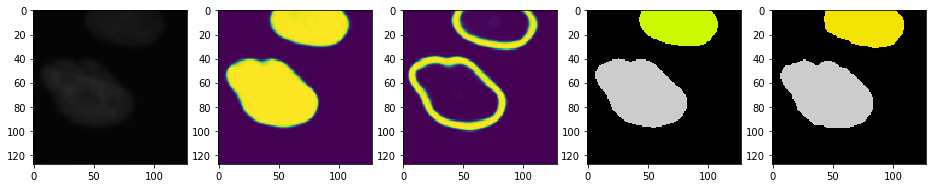

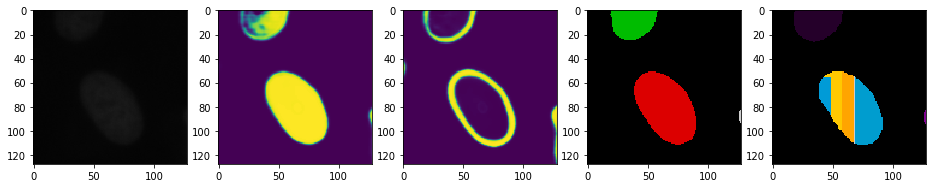

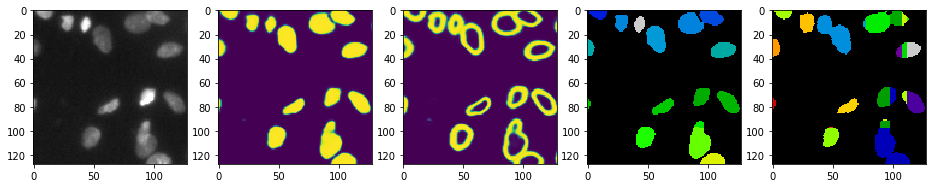

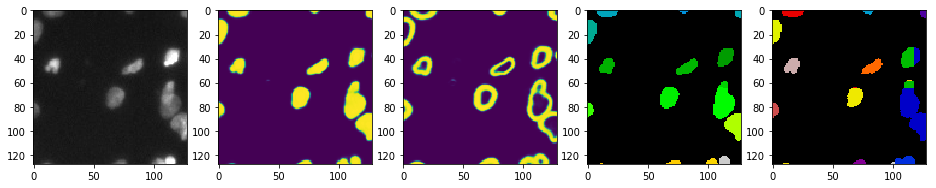

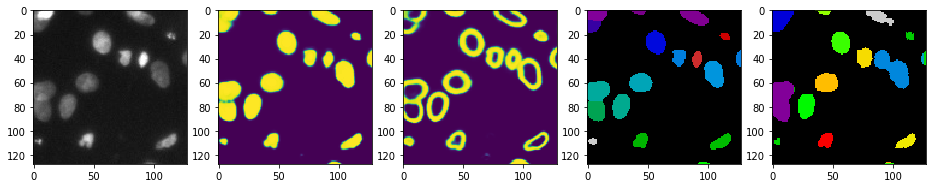

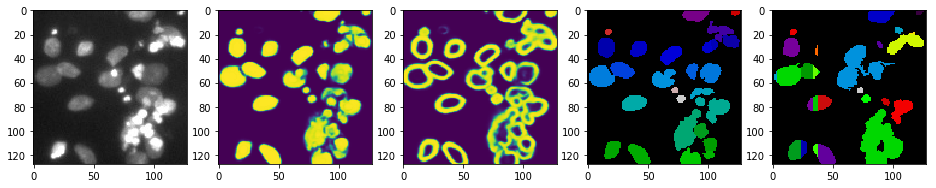

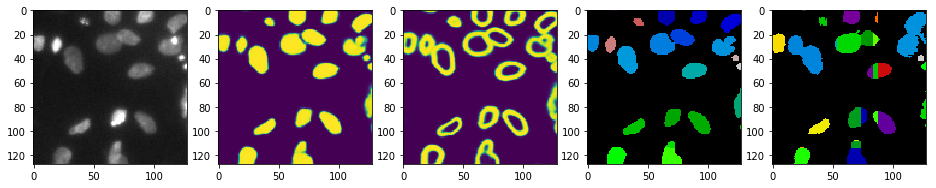

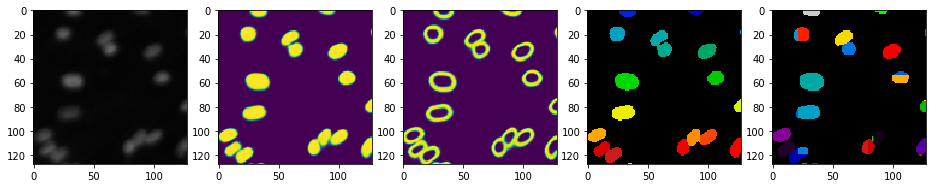

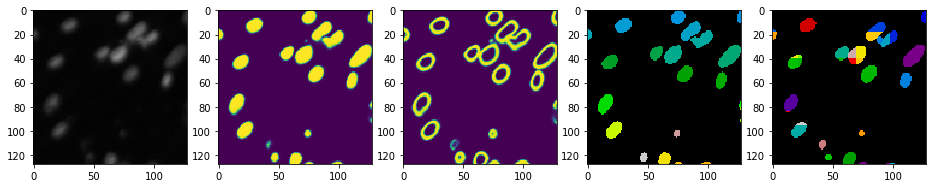

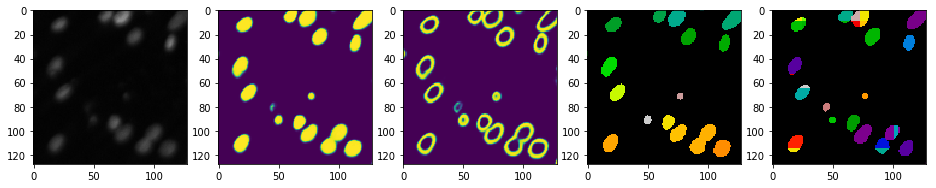

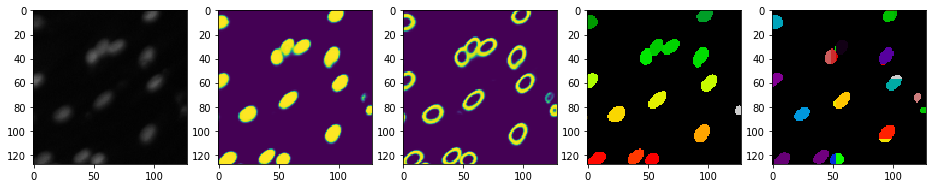

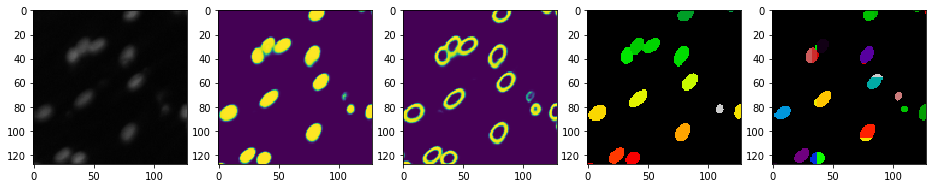

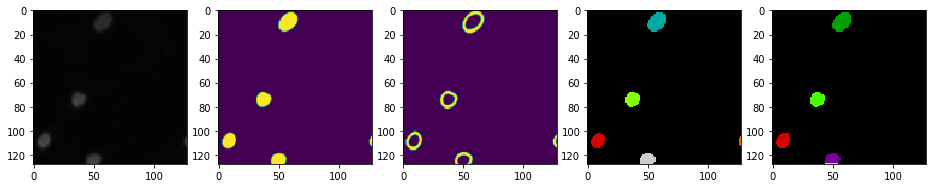

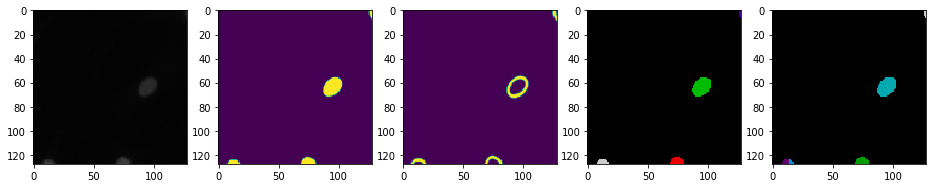

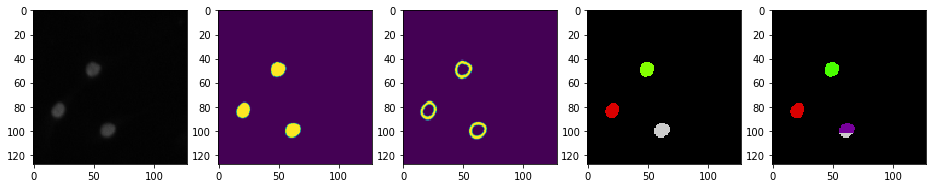

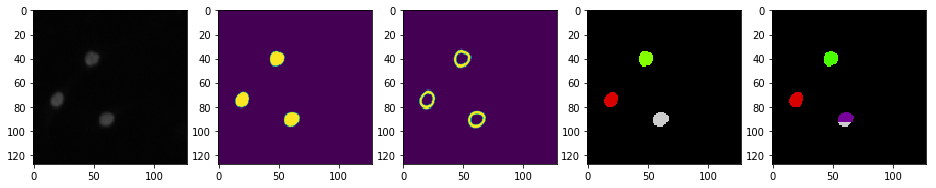

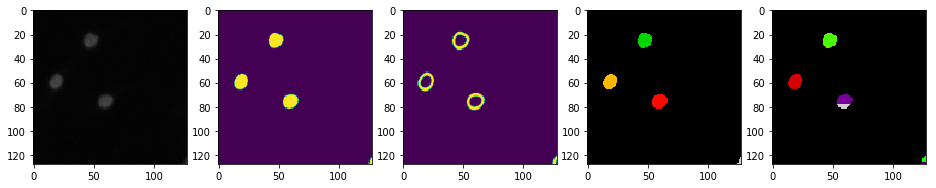

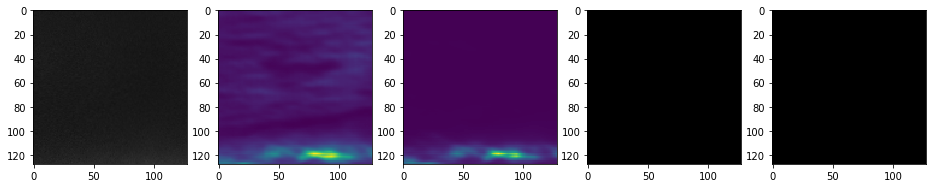

KeyboardInterrupt: 

In [7]:
for idx in range(50):
    for r in range(5):
        raw = plt.imread(meta_train['file_path_image'].tolist()[idx])
        mask = masks[idx]
        contour = contours[idx]
        gt = ground_truth[idx]
        pred = postprocess(mask, contour)

        raw, mask, contour, pred, gt = random_crop(raw, mask, contour, pred, gt, target_shape=(128,128))

        plt.figure(figsize=(16,12))
        plt.subplot(151)
        plt.imshow(raw)
        plt.subplot(152)
        plt.imshow(mask)
        plt.subplot(153)
        plt.imshow(contour)
        plt.subplot(154)
        plt.imshow(pred,cmap='nipy_spectral')
        plt.subplot(155)
        plt.imshow(gt,cmap='nipy_spectral')
        plt.show()